In [ ]:
!date
!pwd

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
#from tqdm import tqdm
import math as mt
import numpy as np

### Чтение данных

In [2]:
# чтение данных обработки экспериментальных событий как сигнала
rsignal = pd.read_csv('Result-Signal', index_col=0, sep='\s+')
# количество событий
print('events:', len(rsignal))
rsignal[:4]

events: 1911


,SNRatio,AbsSignal,TotalNoise,NNear3,Theta,dt2,ng
nev,,,,,,,
10675,107.211700,381.888,3.562,31,0.204204,0.766965,34
10677,13.492210,719.364,53.317,51,0.486947,1.157275,56
10679,0.101800,61.124,600.431,9,1.193805,2.939874,14
10681,0.014809,379.171,25603.580,39,1.162389,2.477168,44


In [3]:
# чтение данных обработки экспериментальных событий как шума
rnoise = pd.read_csv('Result-Noise', index_col=0, sep='\s+')
print('events:', len(rnoise))
rnoise[:4]

events: 1911


,SNRatio,AbsSignal,TotalNoise,dt2,ng
nev,,,,,
10675,37.680380,375.485,9.965,1.802776,32
10677,0.497918,249.740,501.569,1.519109,13
10679,0.077615,218.918,2820.565,1.058301,25
10681,0.009828,397.253,40419.650,1.505545,45


In [4]:
# слияние массивов
all=pd.merge(rsignal,rnoise,  suffixes=('_s','_n'), left_index=True, right_index=True, how='outer')
print(len(all))
all[:3]

1911


,SNRatio_s,AbsSignal_s,TotalNoise_s,NNear3,Theta,dt2_s,ng_s,SNRatio_n,AbsSignal_n,TotalNoise_n,dt2_n,ng_n
nev,,,,,,,,,,,,
10675,107.21170,381.888,3.562,31,0.204204,0.766965,34,37.680380,375.485,9.965,1.802776,32
10677,13.49221,719.364,53.317,51,0.486947,1.157275,56,0.497918,249.740,501.569,1.519109,13
10679,0.10180,61.124,600.431,9,1.193805,2.939874,14,0.077615,218.918,2820.565,1.058301,25


In [5]:
# посмотрим кадры с большой суммой сигнала
all[:][all['AbsSignal_s'] > 10000]

,SNRatio_s,AbsSignal_s,TotalNoise_s,NNear3,Theta,dt2_s,ng_s,SNRatio_n,AbsSignal_n,TotalNoise_n,dt2_n,ng_n
nev,,,,,,,,,,,,
11048,30.78734,133382.30,4332.375,3,1.083849,2.000000,12,0.023400,33.064,1413.010,0.816497,6
11588,207.34480,10232.47,49.350,87,0.424115,1.105542,90,0.394112,2696.952,6843.118,1.390444,15
13930,7.01154,21667.94,3090.326,107,1.319469,1.737438,107,0.126427,2159.759,17083.060,2.202272,20
14202,118.79880,11754.54,98.945,107,0.486947,0.927261,107,0.271037,2449.132,9036.137,2.276361,11


In [10]:
# НЕ Выбросим кадр 11048: в нем суммарный сигнал очень большой (дверь)
all[:][all['AbsSignal_s']> 100000]
#all = all[:][all['AbsSignal_s'] < 100000]
#print(len(all))
#all[:3]

,SNRatio_s,AbsSignal_s,TotalNoise_s,NNear3,Theta,dt2_s,ng_s,SNRatio_n,AbsSignal_n,TotalNoise_n,dt2_n,ng_n
nev,,,,,,,,,,,,
11048,30.78734,133382.3,4332.375,3,1.083849,2.0,12,0.0234,33.064,1413.01,0.816497,6


## Построение распределений критериев

In [6]:
param=['SNRatio_s','SNRatio_n','AbsSignal_s','AbsSignal_n','TotalNoise_s','TotalNoise_n','NNear3','Theta','dt2_s','dt2_n','ng_s','ng_n'] 
len(param)

12

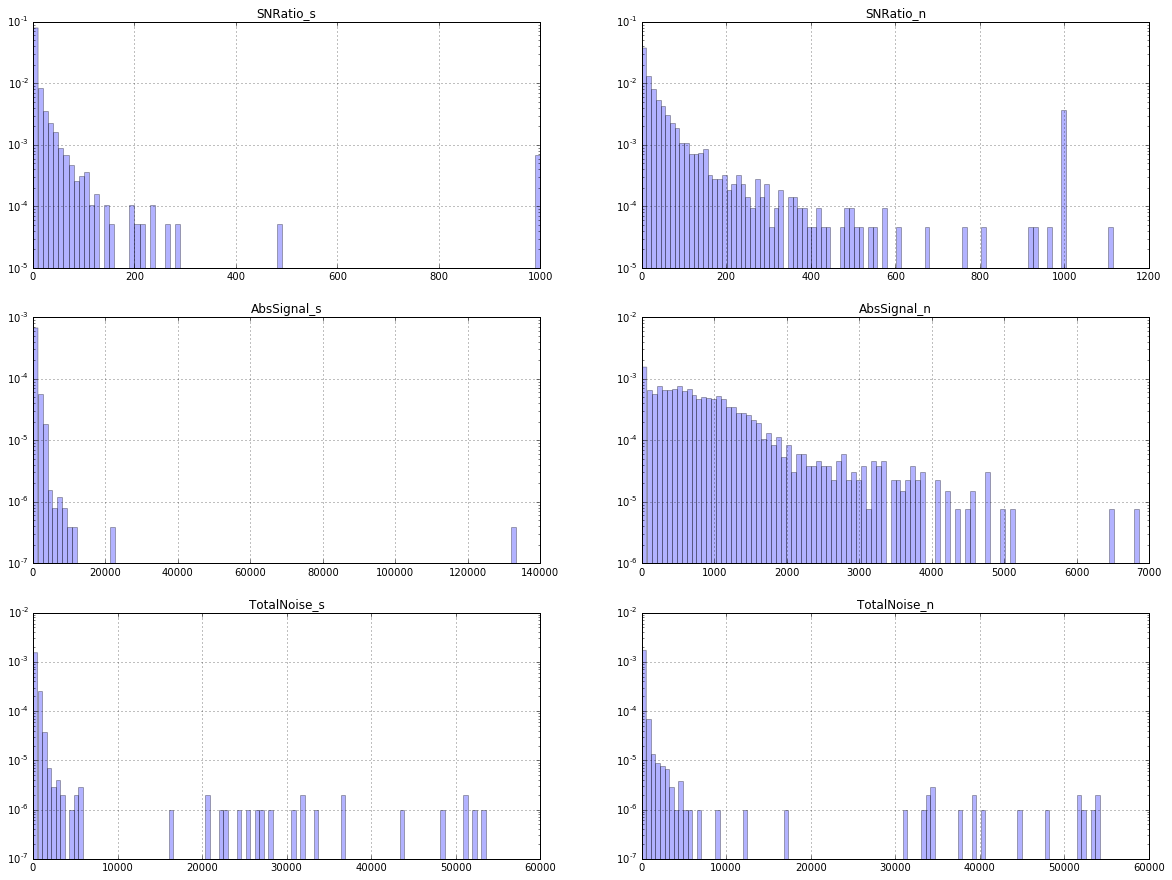

In [11]:
plt.figure(figsize=(20,15))
for i in range(len(param)//2):
    plt.subplot(321+i)
    plt.hist(all[param[i]], bins = 100, alpha = 0.3, color = 'b', normed=True)
    plt.title(param[i])
    plt.yscale('log')
    plt.grid()

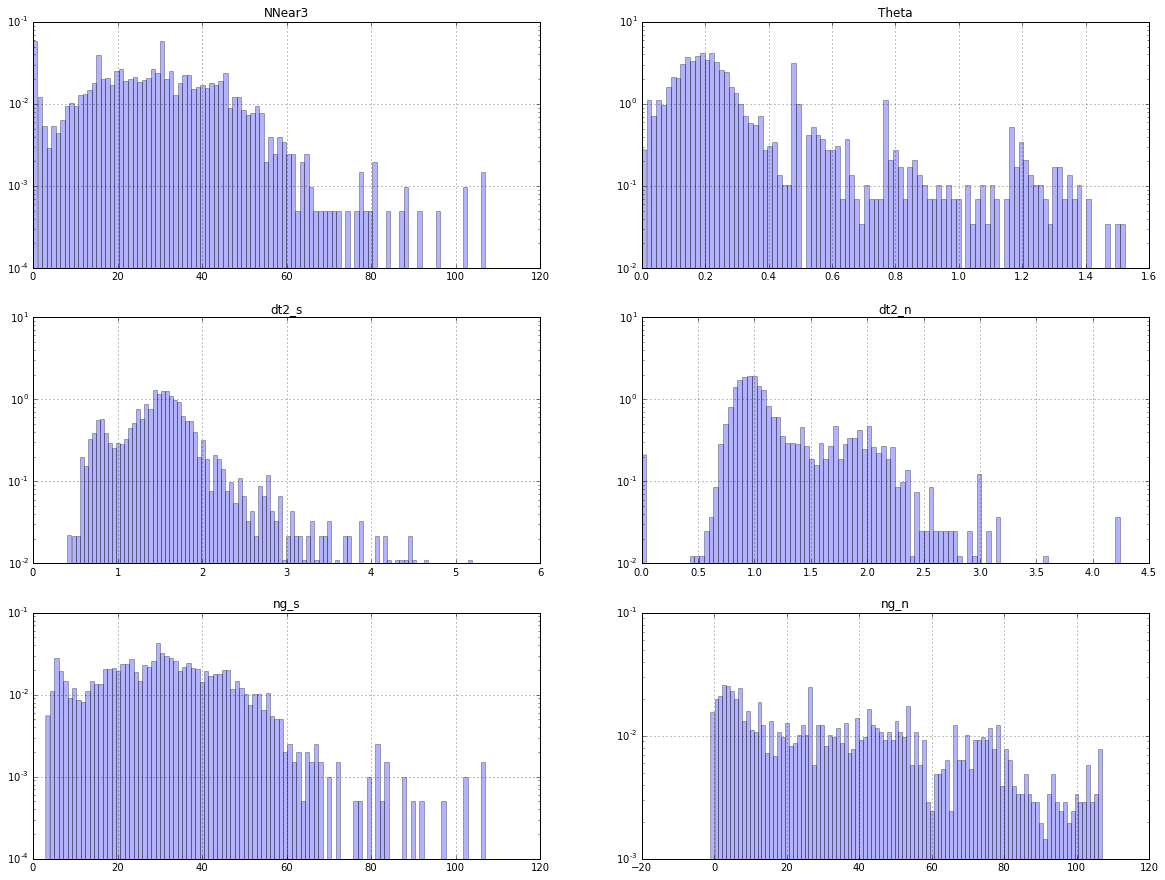

In [8]:
plt.figure(figsize=(20,15))
for i in range(len(param)//2 , len(param)):
    plt.subplot(321+i-6)
    plt.hist(all[param[i]], bins = 100, alpha = 0.3, color = 'b', normed=True)
    plt.title(param[i])
    plt.yscale('log')
    plt.grid()

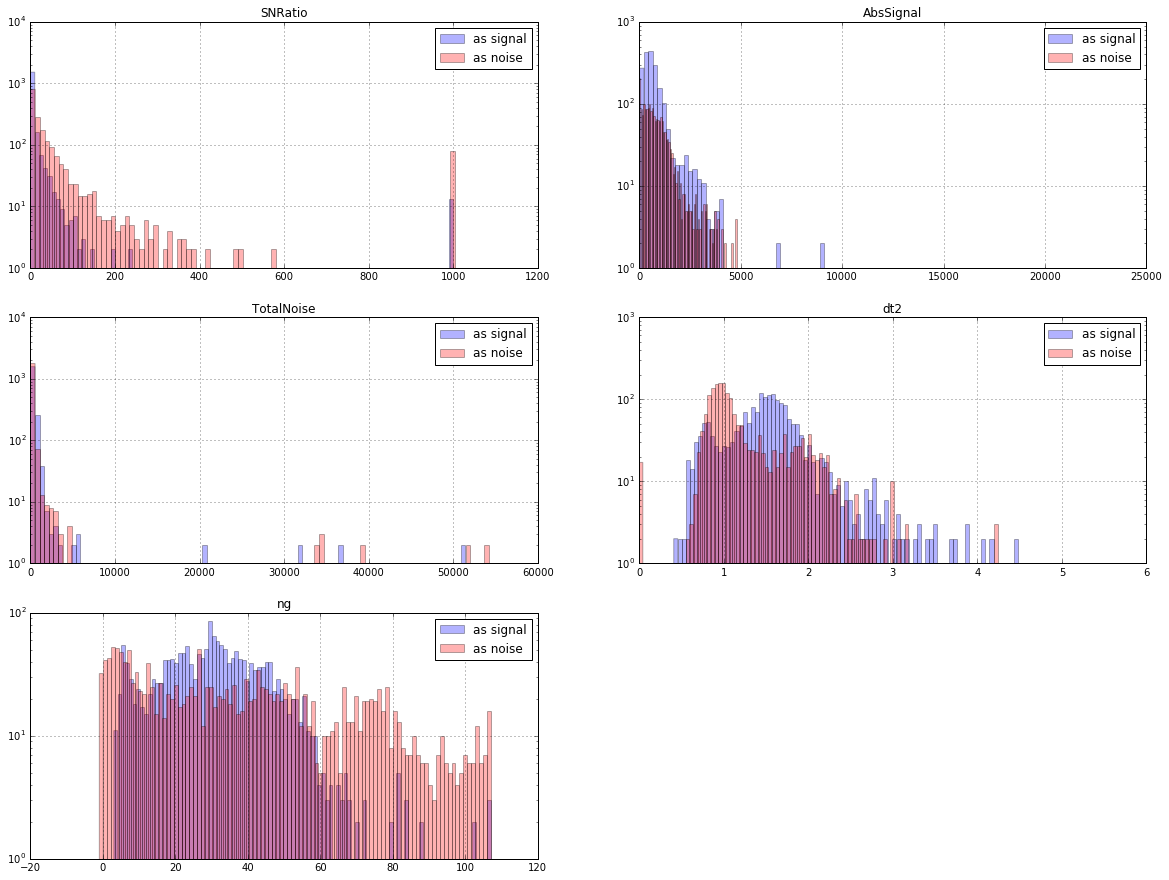

In [9]:
sparam=['SNRatio','AbsSignal','TotalNoise','dt2','ng'] 
plt.figure(figsize=(20,15))
for i in range(len(sparam)):
    plt.subplot(321+i)
    plt.hist(all[sparam[i]+'_s'][all['AbsSignal_s'] < 100000], bins = 100, alpha = 0.3, color = 'b', label=r"as signal") #, normed=True
    plt.hist(all[sparam[i]+'_n'][all['AbsSignal_s'] < 100000], bins = 100, alpha = 0.3, color = 'r', label=r"as noise")  #, normed=True
    plt.title(sparam[i])
    plt.legend(loc=1)
    plt.yscale('log')
    plt.grid()

In [12]:
# чтение событий ШАЛ по версии Димы
dima = pd.read_csv('timur2013.csv', header = 0, index_col=2, sep='\s+')
eas = pd.core.frame.DataFrame(dima, columns=['EAS'])
eas['EAS'] = int(1)
eas[:3]
# добавляем признак ШАЛ к данным
alll=all.join(eas)
# заменяем NAN на 0
alll.fillna(0, inplace=True)
alll[:3]

,SNRatio_s,AbsSignal_s,TotalNoise_s,NNear3,Theta,dt2_s,ng_s,SNRatio_n,AbsSignal_n,TotalNoise_n,dt2_n,ng_n,EAS
nev,,,,,,,,,,,,,
10675,107.21170,381.888,3.562,31,0.204204,0.766965,34,37.680380,375.485,9.965,1.802776,32,1.0
10677,13.49221,719.364,53.317,51,0.486947,1.157275,56,0.497918,249.740,501.569,1.519109,13,1.0
10679,0.10180,61.124,600.431,9,1.193805,2.939874,14,0.077615,218.918,2820.565,1.058301,25,0.0


In [13]:
eas = alll['EAS']
eas[:4]

nev
10675    1.0
10677    1.0
10679    0.0
10681    0.0
Name: EAS, dtype: float64

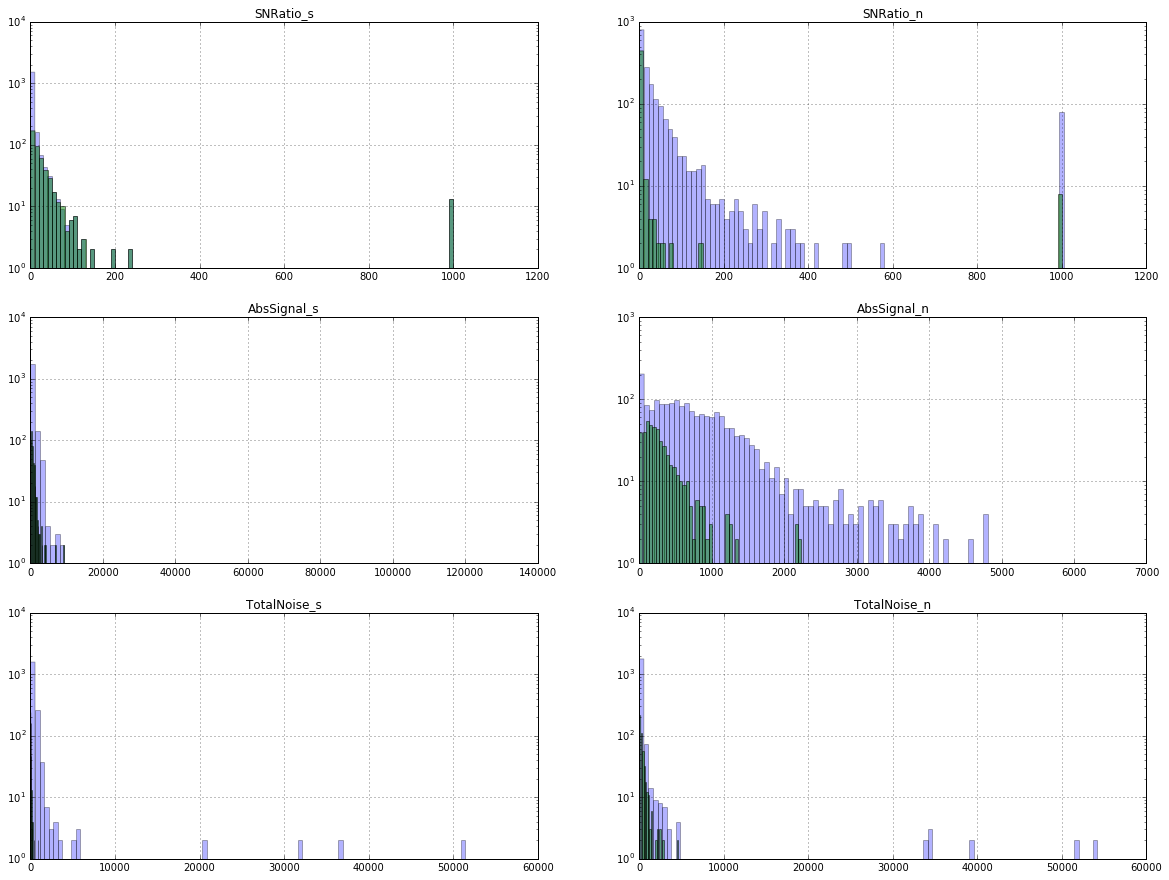

In [14]:
plt.figure(figsize=(20,15))
for i in range(len(param)//2):
    plt.subplot(321+i)
    plt.hist(alll[param[i]],                 bins = 100, alpha = 0.3, color = 'b') #, normed=True)
    plt.hist(alll[param[i]][alll['EAS']==1], bins = 100, alpha = 0.5, color = 'g') #, normed=True)
    plt.title(param[i])
    plt.yscale('log')
    plt.grid()

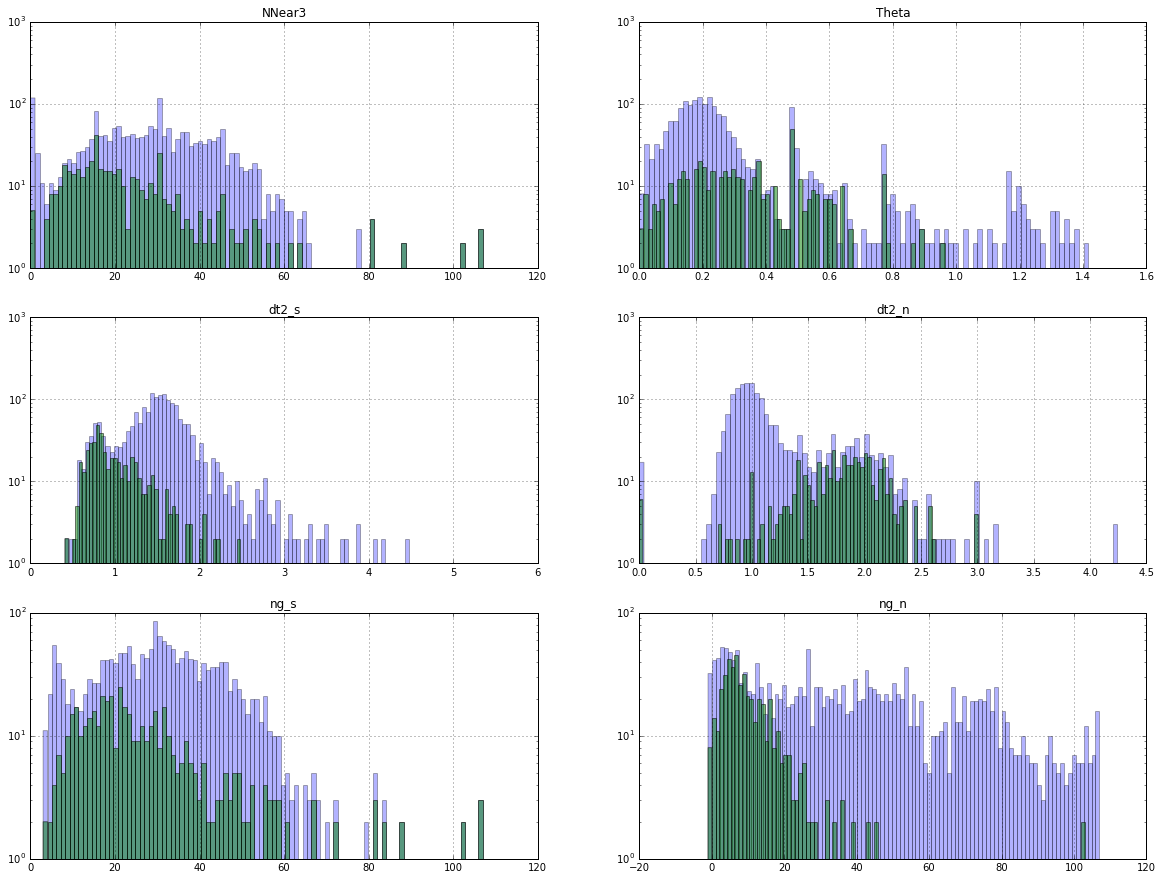

In [15]:
plt.figure(figsize=(20,15))
for i in range(len(param)//2 , len(param)):
    plt.subplot(321+i-6)
    plt.hist(alll[param[i]],                 bins = 100, alpha = 0.3, color = 'b') #, normed=True)
    plt.hist(alll[param[i]][alll['EAS']==1], bins = 100, alpha = 0.5, color = 'g') #, normed=True)
    plt.title(param[i])
    plt.yscale('log')
    plt.grid()

In [16]:
# считаем корреляции
alll.corr()

,SNRatio_s,AbsSignal_s,TotalNoise_s,NNear3,Theta,dt2_s,ng_s,SNRatio_n,AbsSignal_n,TotalNoise_n,dt2_n,ng_n,EAS
SNRatio_s,1.000000,0.023665,-0.032480,0.002184,0.028694,-0.145292,0.005845,-0.023982,-0.077316,-0.001702,0.174122,-0.155301,0.270871
AbsSignal_s,0.023665,1.000000,0.018461,0.151436,0.021829,-0.000270,0.159165,0.008242,0.170246,0.024763,-0.026809,0.063759,0.001678
TotalNoise_s,-0.032480,0.018461,1.000000,0.091591,0.283171,0.177175,0.111452,-0.028620,-0.010642,0.956699,0.015477,0.070022,-0.094508
NNear3,0.002184,0.151436,0.091591,1.000000,-0.379336,-0.089013,0.993276,0.121605,0.631661,0.106661,-0.239072,0.723815,-0.120831
Theta,0.028694,0.021829,0.283171,-0.379336,1.000000,0.535947,-0.339556,-0.153730,-0.416593,0.336099,0.379329,-0.519484,0.100352
dt2_s,-0.145292,-0.000270,0.177175,-0.089013,0.535947,1.000000,-0.065010,0.027179,0.056324,0.148659,-0.136961,0.135520,-0.496486
ng_s,0.005845,0.159165,0.111452,0.993276,-0.339556,-0.065010,1.000000,0.107656,0.612215,0.130777,-0.209403,0.704604,-0.106476
SNRatio_n,-0.023982,0.008242,-0.028620,0.121605,-0.153730,0.027179,0.107656,1.000000,0.208567,-0.054421,-0.173779,0.221327,-0.171614
AbsSignal_n,-0.077316,0.170246,-0.010642,0.631661,-0.416593,0.056324,0.612215,0.208567,1.000000,-0.066183,-0.349733,0.748454,-0.330809
TotalNoise_n,-0.001702,0.024763,0.956699,0.106661,0.336099,0.148659,0.130777,-0.054421,-0.066183,1.000000,0.080927,-0.011609,-0.016862


# Методы ML

## Метод решающих деревьев

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
param = ['EAS','dt2_s', 'dt2_n', 'ng_n', 'AbsSignal_n', 'SNRatio_s', 'SNRatio_n', 'NNear3','Theta', 'ng_s']
four = alll[param]
four.corr()

,EAS,dt2_s,dt2_n,ng_n,AbsSignal_n,SNRatio_s,SNRatio_n,NNear3,Theta,ng_s
EAS,1.000000,-0.496486,0.597440,-0.533730,-0.330809,0.270871,-0.171614,-0.120831,0.100352,-0.106476
dt2_s,-0.496486,1.000000,-0.136961,0.135520,0.056324,-0.145292,0.027179,-0.089013,0.535947,-0.065010
dt2_n,0.597440,-0.136961,1.000000,-0.518030,-0.349733,0.174122,-0.173779,-0.239072,0.379329,-0.209403
ng_n,-0.533730,0.135520,-0.518030,1.000000,0.748454,-0.155301,0.221327,0.723815,-0.519484,0.704604
AbsSignal_n,-0.330809,0.056324,-0.349733,0.748454,1.000000,-0.077316,0.208567,0.631661,-0.416593,0.612215
SNRatio_s,0.270871,-0.145292,0.174122,-0.155301,-0.077316,1.000000,-0.023982,0.002184,0.028694,0.005845
SNRatio_n,-0.171614,0.027179,-0.173779,0.221327,0.208567,-0.023982,1.000000,0.121605,-0.153730,0.107656
NNear3,-0.120831,-0.089013,-0.239072,0.723815,0.631661,0.002184,0.121605,1.000000,-0.379336,0.993276
Theta,0.100352,0.535947,0.379329,-0.519484,-0.416593,0.028694,-0.153730,-0.379336,1.000000,-0.339556
ng_s,-0.106476,-0.065010,-0.209403,0.704604,0.612215,0.005845,0.107656,0.993276,-0.339556,1.000000


In [35]:
features = param [1:]
X = alll[features]
#X = alll[['dt2_s', 'dt2_n', 'ng_n', 'AbsSignal_n', 'SNRatio_s', 'SNRatio_n', 'NNear3','Theta', 'ng_s']]
len(X)
X[:3]

,dt2_s,dt2_n,ng_n,AbsSignal_n,SNRatio_s,SNRatio_n,NNear3,Theta,ng_s
nev,,,,,,,,,
10675,0.766965,1.802776,32,375.485,107.21170,37.680380,31,0.204204,34
10677,1.157275,1.519109,13,249.740,13.49221,0.497918,51,0.486947,56
10679,2.939874,1.058301,25,218.918,0.10180,0.077615,9,1.193805,14


In [36]:
Y = alll['EAS']
len(Y)

1911

In [37]:
# Обучим решающее дерево с параметром random_state=241 и остальными параметрами по умолчанию.
clf = DecisionTreeClassifier(random_state=241)
clf.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=241, splitter='best')

In [41]:
# Вычислим важности признаков и найдем признаки с наибольшей важностью. 
importances = clf.feature_importances_
for i in range(len(importances)):
    print(features[i],'\t',importances[i])

dt2_s 	 0.0382112684726
dt2_n 	 0.526642794526
ng_n 	 0.0687023968206
AbsSignal_n 	 0.0156483064229
SNRatio_s 	 0.228825568894
SNRatio_n 	 0.0353482366931
NNear3 	 0.0665143950141
Theta 	 0.0148218269403
ng_s 	 0.00528520621581


### Построение дерева

In [42]:
clf.decision_path(X)

<1911x119 sparse matrix of type '<class 'numpy.int64'>'
	with 15881 stored elements in Compressed Sparse Row format>

In [43]:
from sklearn import tree
tree.export_graphviz(clf, out_file='tree.dot')  

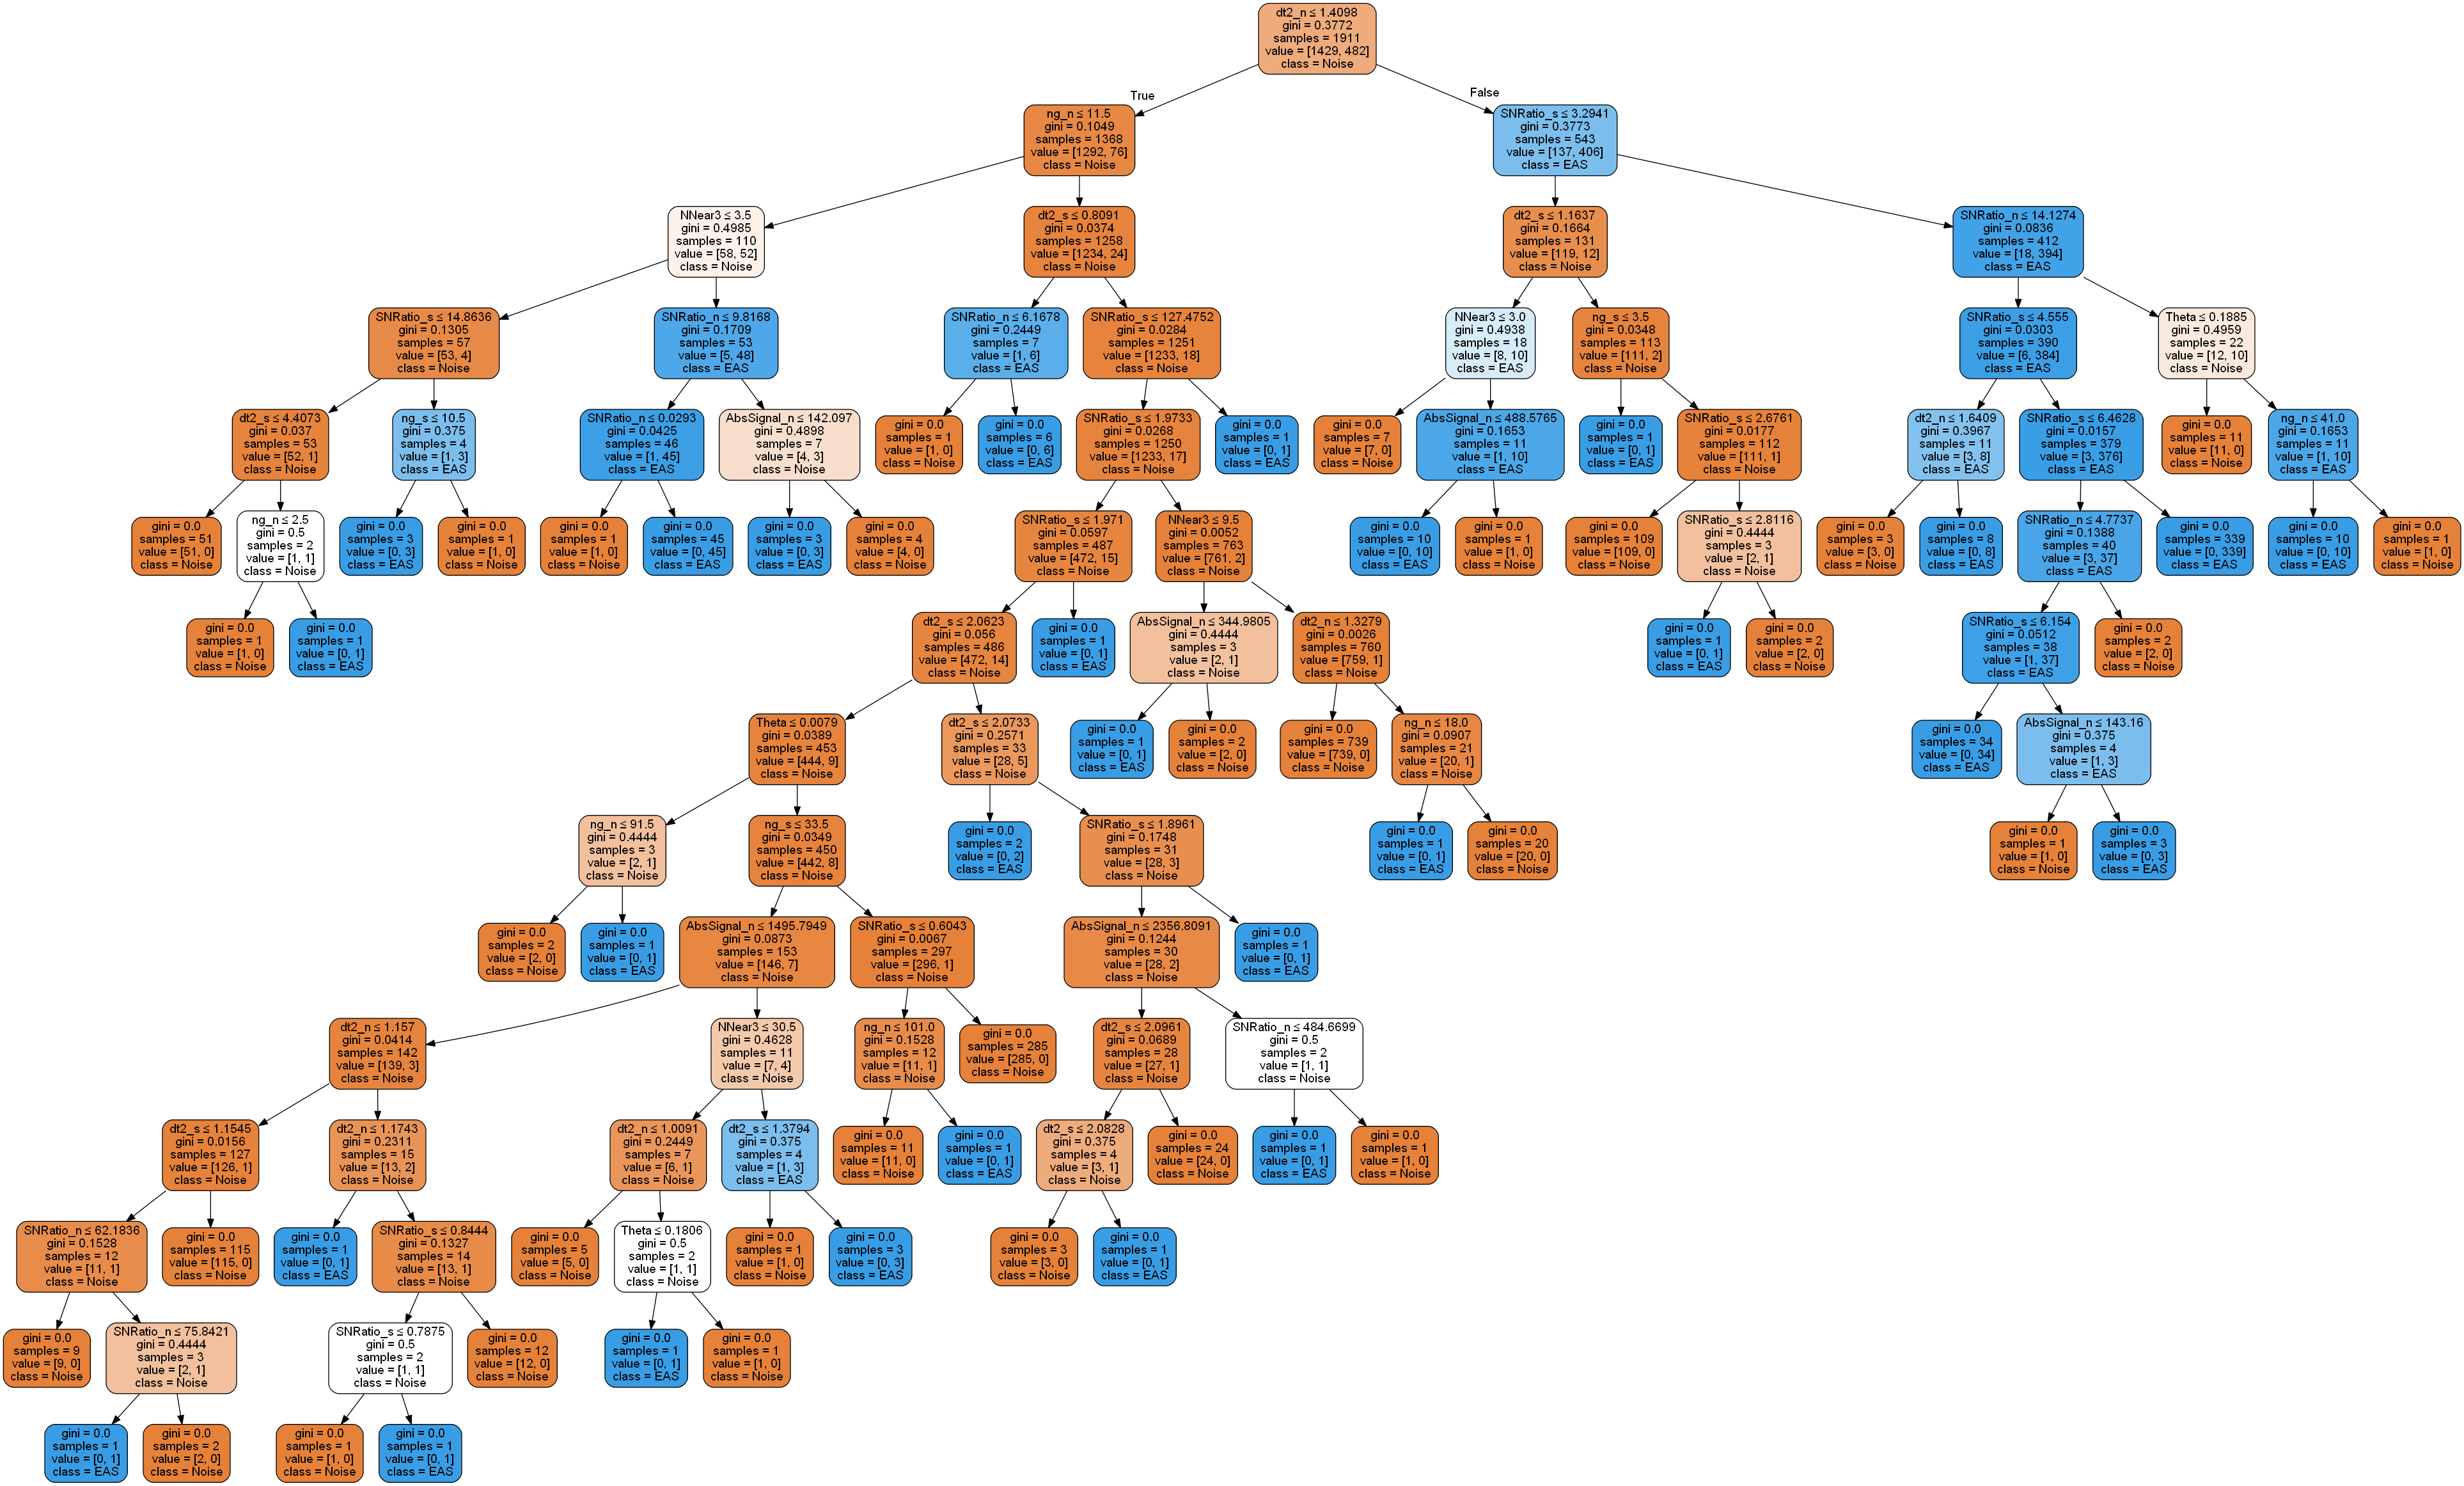

In [56]:
# create png
from IPython.display import Image  
import pydotplus 

target_names = ['Noise','EAS']
dot_data = tree.export_graphviz(clf, out_file=None, 
                feature_names=features,  
                class_names=target_names,  
                filled=True, rounded=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

In [46]:
graph.write_pdf("tree.pdf")

True

In [57]:
graph.write_png("tree.png")

True

### Уменьшим количество признаков

In [67]:
features = param [1:6]
X = alll[features]
Y = alll['EAS']
# Обучим решающее дерево с параметром random_state=241 и остальными параметрами по умолчанию.
clf = DecisionTreeClassifier(random_state=241,max_leaf_nodes=8, min_samples_leaf=2)
clf.fit(X, Y)
# Вычислим важности признаков и найдем признаки с наибольшей важностью. 
importances = clf.feature_importances_
for i in range(len(importances)):
    print(features[i],'\t',importances[i])

dt2_s 	 0.0303493481723
dt2_n 	 0.598951329024
ng_n 	 0.0848681235933
AbsSignal_n 	 0.0
SNRatio_s 	 0.28583119921


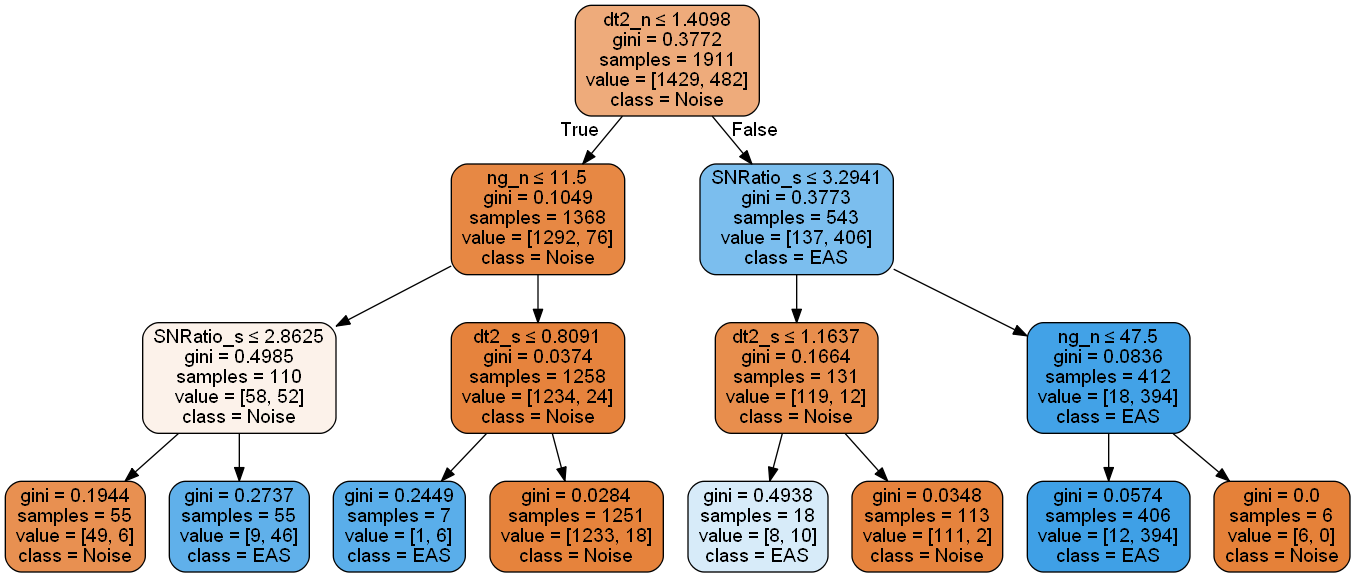

In [68]:
# построим дерево по 5 признакам
clf.decision_path(X)
tree.export_graphviz(clf, out_file='tree.dot')  
target_names = ['Noise','EAS']
dot_data = tree.export_graphviz(clf, out_file=None, 
                feature_names=features,  
                class_names=target_names,  
                filled=True, rounded=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("tree5-8-2.png")
graph.write_pdf("tree5-8-2.pdf")
Image(graph.create_png())  

# ESLE

In [69]:
clf.score(X,Y)

0.97069597069597069

In [64]:
clf.apply(X)

array([ 9,  9, 12, ..., 12, 12, 12], dtype=int64)

In [65]:
XX = clf._validate_X_predict(X, check_input=True)

#tr = clf.tree_.decision_path(XX)
print(XX)

[[  7.66964972e-01   1.80277598e+00   3.20000000e+01   3.75484985e+02
    1.07211700e+02]
 [  1.15727496e+00   1.51910901e+00   1.30000000e+01   2.49740005e+02
    1.34922104e+01]
 [  2.93987393e+00   1.05830097e+00   2.50000000e+01   2.18917999e+02
    1.01800203e-01]
 ..., 
 [  1.42427897e+00   1.06542695e+00   3.70000000e+01   5.49817017e+02
    4.12749195e+00]
 [  1.17513895e+00   9.22531188e-01   4.70000000e+01   1.02392200e+03
    9.57330513e+00]
 [  1.36872900e+00   1.00000000e+00   9.00000000e+01   1.26865405e+03
    1.71050091e+01]]


In [71]:
Z=clf.predict_proba(X)
Z

array([[ 0.02955665,  0.97044335],
       [ 0.02955665,  0.97044335],
       [ 0.98561151,  0.01438849],
       ..., 
       [ 0.98561151,  0.01438849],
       [ 0.98561151,  0.01438849],
       [ 0.98561151,  0.01438849]])

In [28]:
len(Z[:])

1911

In [30]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree.tree:

class DecisionTreeClassifier(BaseDecisionTree, sklearn.base.ClassifierMixin)
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : string, optional (default="best")
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_features : int, float, string or None, optional (default=None)
 |      The number of features to consider when looking for the best split:
 |        - If int, then consider `max_features` features at each split.
 |        - If float, then `max_features` is a percentage and
 |         

In [50]:
print( '\nclf Attributes...' )
for atttribute in dir( clf ):
    if atttribute[0] != '_':
        print( atttribute, ':', getattr( clf , atttribute ) )


clf Attributes...
apply : <bound method BaseDecisionTree.apply of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=241, splitter='best')>
class_weight : None
classes_ : [ 0.  1.]
criterion : gini
feature_importances_ : [ 0.03821127  0.52664279  0.0687024   0.01564831  0.22882557  0.03534824
  0.0665144   0.01482183  0.00528521]
fit : <bound method BaseDecisionTree.fit of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=241, splitter='best')>
fit_transform : <bound method TransformerMixin.fit_transform of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
         